# Reducing Overfiting

Original Feature - Train MSE: 280.367, Test MSE: 446.553
Discretized Feature - Train MSE: 339.937, Test MSE: 475.515


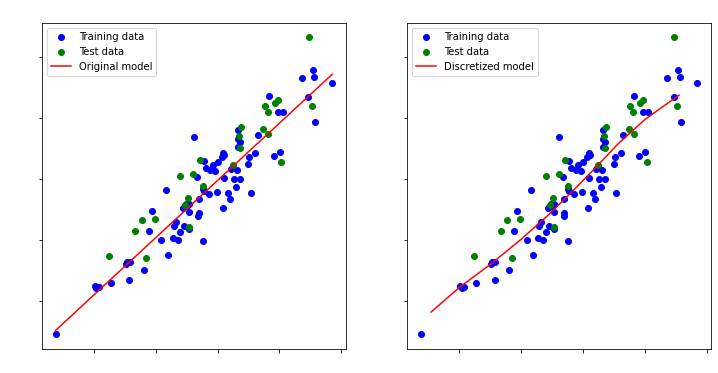

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')

def generate_data(n_samples=100, noise=20, random_state=42):
    """Generates synthetic regression data."""
    X, y = make_regression(n_samples=n_samples, n_features=1, noise=noise, random_state=random_state)
    return train_test_split(X, y, test_size=0.25, random_state=random_state)

def train_model(X_train, y_train, discretize=False, n_bins=10):
    """Trains a linear regression model with or without discretization."""
    if discretize:
        disc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
        X_train_disc = disc.fit_transform(X_train)
        model = LinearRegression().fit(X_train_disc, y_train)
        return model, disc
    else:
        model = LinearRegression().fit(X_train, y_train)
        return model, None

def evaluate_model(model, X, y, discretizer=None):
    """Evaluates a model and calculates Mean Squared Error."""
    if discretizer:
        X = discretizer.transform(X)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse, y_pred

def plot_results(X_train, X_test, y_train, y_test, model_original, model_disc, disc):
    """Plots the training and test data with both models' predictions."""
    plt.figure(figsize=(12, 6))

    # Original feature plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(np.sort(X_train, axis=0), model_original.predict(np.sort(X_train, axis=0)), color='red', label='Original model')
    plt.title('Original Feature', color = 'white')
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.legend()

    # Discretized feature plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    bin_edges = disc.bin_edges_[0]
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_mids, model_disc.predict(disc.transform(bin_mids.reshape(-1, 1))), color='red', label='Discretized model')
    plt.title('Discretized Feature', color = 'white')
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.legend()

    plt.show()

def main():
    # Data generation
    X_train, X_test, y_train, y_test = generate_data()

    # Train models
    model_original, _ = train_model(X_train, y_train, discretize=False)
    model_disc, disc = train_model(X_train, y_train, discretize=True)

    # Evaluate models
    mse_train_orig, _ = evaluate_model(model_original, X_train, y_train)
    mse_test_orig, _ = evaluate_model(model_original, X_test, y_test)
    mse_train_disc, _ = evaluate_model(model_disc, X_train, y_train, discretizer=disc)
    mse_test_disc, _ = evaluate_model(model_disc, X_test, y_test, discretizer=disc)

    # Print MSE results
    print(f'Original Feature - Train MSE: {mse_train_orig:.3f}, Test MSE: {mse_test_orig:.3f}')
    print(f'Discretized Feature - Train MSE: {mse_train_disc:.3f}, Test MSE: {mse_test_disc:.3f}')

    # Plot results
    plot_results(X_train, X_test, y_train, y_test, model_original, model_disc, disc)

# Run the main function
main()


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Function to train a model with optional discretization and print X_train_disc if discretized
def train_model(X_train, y_train, discretize=False, n_bins=10):
    """Trains a linear regression model with or without discretization, printing X_train_disc if used."""
    if discretize:
        # Initialize discretizer
        disc = KBinsDiscretizer(n_bins=n_bins, encode='onehot', strategy='kmeans')
        
        # Fit and transform X_train with discretizer
        X_train_disc = disc.fit_transform(X_train)
        
        # Print discretized X_train
        print("Discretized X_train:\n", X_train_disc)
        
        # Fit model on discretized data
        model = LinearRegression().fit(X_train_disc, y_train)
        
        return model, disc
    else:
        # Fit model on original data
        model = LinearRegression().fit(X_train, y_train)
        return model, None

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Call train_model with discretization to print X_train_disc
model, disc = train_model(X_train, y_train, discretize=True)


Discretized X_train:
   (0, 6)	1.0
  (1, 6)	1.0
  (2, 2)	1.0
  (3, 8)	1.0
  (4, 2)	1.0
  (5, 9)	1.0
  (6, 4)	1.0
  (7, 5)	1.0
  (8, 4)	1.0
  (9, 4)	1.0
  (10, 7)	1.0
  (11, 2)	1.0
  (12, 8)	1.0
  (13, 6)	1.0
  (14, 1)	1.0
  (15, 6)	1.0
  (16, 3)	1.0
  (17, 7)	1.0
  (18, 9)	1.0
  (19, 5)	1.0
  (20, 0)	1.0
  (21, 6)	1.0
  (22, 9)	1.0
  (23, 3)	1.0
  (24, 5)	1.0
  :	:
  (50, 5)	1.0
  (51, 9)	1.0
  (52, 6)	1.0
  (53, 4)	1.0
  (54, 1)	1.0
  (55, 4)	1.0
  (56, 8)	1.0
  (57, 6)	1.0
  (58, 3)	1.0
  (59, 6)	1.0
  (60, 5)	1.0
  (61, 6)	1.0
  (62, 3)	1.0
  (63, 8)	1.0
  (64, 5)	1.0
  (65, 9)	1.0
  (66, 3)	1.0
  (67, 4)	1.0
  (68, 6)	1.0
  (69, 7)	1.0
  (70, 6)	1.0
  (71, 2)	1.0
  (72, 3)	1.0
  (73, 6)	1.0
  (74, 5)	1.0


Shape of X: (100, 1)
Shape of y: (100, 1)


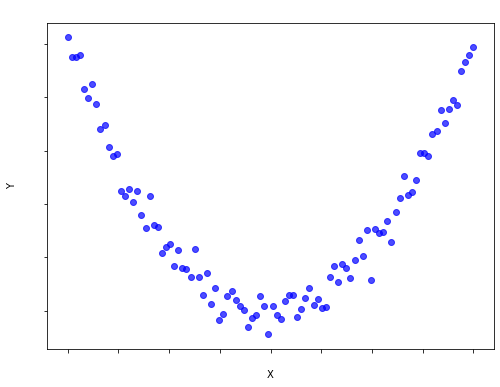

In [24]:
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = X ** 2 + np.random.normal(0, 5, size = X.shape[0]).reshape(-1, 1)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
plt.figure(figsize=(8, 6))
plt.scatter(X, y , color = 'blue', alpha=0.7)
plt.title("Simulated Dataset with U-shaped Pattern", color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [25]:
model_nd = LinearRegression().fit(X, y)
y_pred_nd = model_nd.predict(X)

In [26]:
discretizer = KBinsDiscretizer(n_bins= 4, encode='onehot', strategy='quantile')
X_discrete = discretizer.fit_transform(X)
model_d = LinearRegression().fit(X_discrete, y)
X_discrete.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [27]:
y_pred_d = model_d.predict(X_discrete)
mse_nd = mean_squared_error(y, y_pred_nd)
mse_d = mean_squared_error(y, y_pred_d)
(mse_nd, mse_d)

(962.2105319929109, 314.458204161572)

# Piecewise Regression

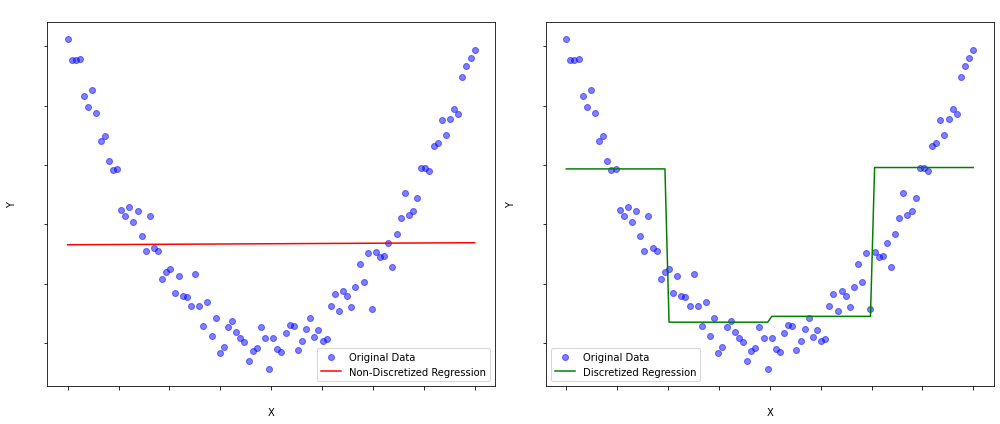

In [28]:
# Plot the results
plt.figure(figsize=(14, 6))

# Non-discretized regressiony_p
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_nd, color='red', label='Non-Discretized Regression')
plt.title('Non-Discretized Linear Regression', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Discretized regression
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_d, color='green', label='Discretized Regression')
plt.title('Discretized Linear Regression', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()